Found 3305 files belonging to 9 classes.
Found 587 files belonging to 9 classes.


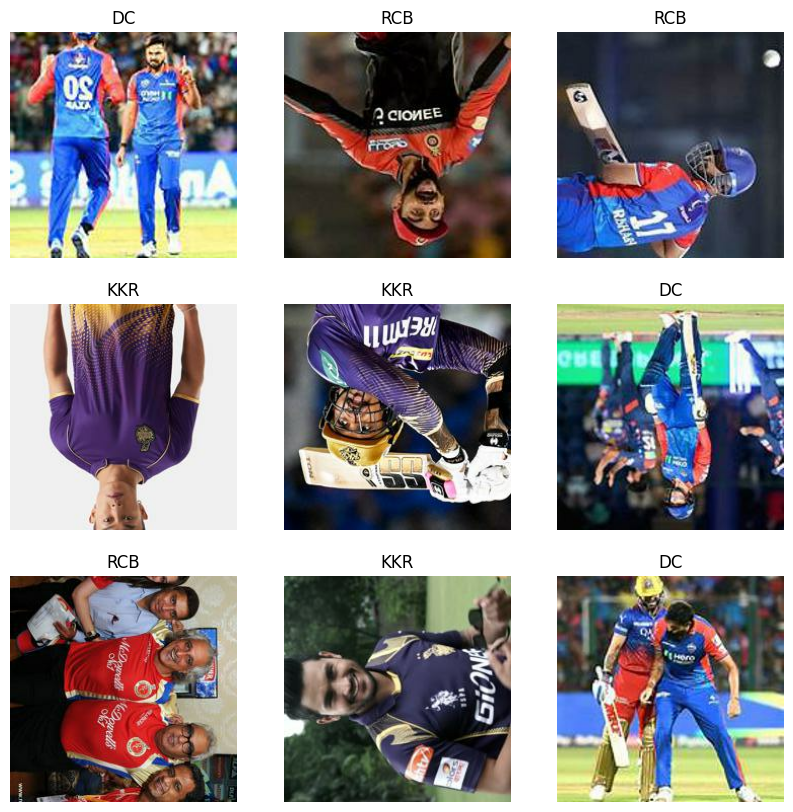

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Define paths
train_dir = r'datasets\IPL_train'
val_dir = r'datasets\IPL_test'

# Load datasets
train_dataset = image_dataset_from_directory(train_dir, 
                                             batch_size=32, 
                                             image_size=(224, 224),
                                             label_mode='int')

val_dataset = image_dataset_from_directory(val_dir, 
                                           batch_size=32, 
                                           image_size=(224, 224),
                                           label_mode='int')

# Visualize some images
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [7]:
from tensorflow.keras import layers, models

def resnet_block(input_tensor, filters, kernel_size=3, stride=1, conv_shortcut=True):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor
    
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    x = resnet_block(x, 64, conv_shortcut=False)
    x = resnet_block(x, 64)
    
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)
    
    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 256)
    
    x = resnet_block(x, 512, stride=2)
    x = resnet_block(x, 512)
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, x)
    return model

# Define the model
input_shape = (224, 224, 3)
num_classes = 9  # Update with the actual number of classes
model = build_resnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_18[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_26[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 56, 56,    │          0 │ add_8[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_19[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_27[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 56, 56,    │      4,160 │ activation_19[0]

 Total params: 11,548,489 (44.05 MB)

 Trainable params: 11,536,969 (44.01 MB)

 Non-trainable params: 11,520 (45.00 KB)

In [9]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=r'models\resnet_best_model.keras', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20,
                    callbacks=callbacks)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8349 - loss: 0.5001 - val_accuracy: 0.3595 - val_loss: 4.3042
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8282 - loss: 0.5476 - val_accuracy: 0.6661 - val_loss: 1.3022
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8598 - loss: 0.4533 - val_accuracy: 0.7871 - val_loss: 0.7207
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8750 - loss: 0.3785 - val_accuracy: 0.6746 - val_loss: 1.7620
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8703 - loss: 0.3691 - val_accuracy: 0.5383 - val_loss: 2.1220
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8972 - loss: 0.3247 - val_accuracy: 0.6985 - val_loss: 1.2298
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8961 - loss: 0.3359 - val_accuracy: 0.9080 - val_loss: 0.2526
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9292 - loss: 0.2116 - val_accu

In [10]:
# Load the best model
model.load_weights(r'models\resnet_best_model.keras')

# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_dataset)
print(f'Validation Accuracy: {val_acc*100:.2f}%')


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.9020 - loss: 0.2510
Validation Accuracy: 90.80%


In [11]:
import os
os.makedirs('models', exist_ok=True)
model.save(r'models\IPL_Jersey_ResNet_MM.keras')

In [19]:
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0])

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()
    print( { class_names[i]:predictions[0][i] for i in range(9) } )

# Example usage
predict_image(r'rand_i\18.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


{'CSK': 0.0007597794, 'DC': 0.05721273, 'GT': 0.00025079414, 'KKR': 0.030860653, 'LSG': 0.00010332353, 'MI': 3.5762696e-05, 'PK': 0.000113757815, 'RCB': 0.58347076, 'RR': 0.32719246}
